# Assignment 09

# Hypothesis Testing with T distribution
Statistical Hypothesis testing is to test the assumption (hypothesis) made and draw the conclusion about the population. This is done by testing the sample representing the whole population and based on the results obtained; the hypothesis is either rejected or accepted.


“Hypothesis is an idea that can be tested”

# Null Hypothesis and Alternative Hypothesis
The null and alternative hypothesis is represented by Ho and Ha respectively.

Hypothesis 0 (Ho): It is an assumption made about the population which needs to be tested and is considered to be true until evidence is found against it

Hypothesis 1 (Ha): It is the opposite of the assumption made and is accepted when the former is rejected.

In [1]:
#importing libraries

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# T-score
The t-value measures the size of the difference relative to the variation in your sample data.

In simply terms a T-score is a standard deviation — a mathematical term that calculates how much a result varies from the average or mean.

<b>Note:-
    When the given size of sample is less than 30 or standard deviation of population is not given we use T score insted of z score</b>

In [2]:
#calculating standard deviation
def std(x):
    sum_of_data=sum(x)
    mean=sum_of_data/len(x)
    var=0
    for i in x:
        summation=(i-mean)**2
        var+=summation
    return (var/len(x))**0.5

In [3]:
#now calculating t score
def t_scoree(sample_mean,population_mean,sample_std,sample_size):
    numerator=sample_mean-population_mean
    denominator=sample_std/(sample_size)**0.5
    
    return numerator/denominator

# Understanding the Hypothesis Testing



Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

# Solving some examples 

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? \ </b>


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1:  \mu=500 $$
Null Hypothesis (Status Quo): $$ H_0: \mu \neq  500 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [4]:
#Here sample_size=10
n=10
a=[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sample_mean=sum(a)/n
print("Sample mean =" ,sample_mean)

sample_std=std(a)
print("Standard Deviation of sample ",sample_std)

Sample mean = 465.3
Standard Deviation of sample  82.3918078451978


<b>Calculating T score

In [5]:
#calculating t score 
sample_mean=465.3
sample_std=82.3918078451978
population_mean=500
sample_size=10

t_score=t_scoree(sample_mean,population_mean,sample_std,sample_size)
print(t_score)


-1.3318197242863192


<b>calculating T-critical value

In [6]:
import scipy.stats

confidence_level=0.95
alpha=1-confidence_level
df=9 #df is degree of freedom
t_crit= scipy.stats.t.ppf(q=1-.05/2,df=9)  #we took alpha/2 is for two tailed test
print(t_crit)

2.2621571627409915


In [7]:
#Decision with t test
if (np.abs(t_score)>t_crit):
    print("Reject the null Hypothesis")
else:
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [8]:
#Decision with p value
p_value= 2*(1.0-norm.cdf(np.abs(t_score)))
print("p_value=",p_value)

if(p_value<alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value= 0.18291943486353945
Fail to reject Null Hypothesis


<b>By plotting we can make it more clear

Text(465.3, 0.0007, 'x_bar')

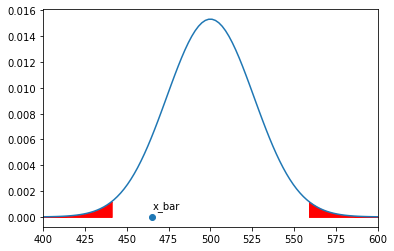

In [9]:
x_min=400 #setting limits on x axis
x_max=600

meann=population_mean
std_1=sample_std/sample_size**0.5

#plotting x and y
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, meann, std_1)
plt.xlim(x_min, x_max)
plt.plot(x, y)

#Computing left and right t critical values
t_critical_left=meann+(-t_crit*std_1)
t_critical_right=meann+(t_crit*std_1)

#shadding left region(rejection)
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, meann, std_1)
plt.fill_between(x1, y1, color='red')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, meann, std_1)
plt.fill_between(x2, y2, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# Conclusion
<b>In above graph we plotted t critical value of left and right tail and we also observed that t score is less than t-critical value so we are failed to reject null hypothesis (mean the average value is not equal to 500

# Question 2

<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?</b>
Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu >4  $$
Null Hypothesis (Status Quo): $$ H_0: \mu \leq 4  $$

Step - 2:  
* Collect a sample of size n = 20 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject \ H_0 \ if ? $$

Step - 5.2: Compute p-value


In [10]:
#Given that
n1=20 #sample size
a1=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sample_mean=sum(a1)/n1
print("Sample mean = ",sample_mean)

print("Standard Deviation of given sample ",std(a1))



Sample mean =  4.25
Standard Deviation of given sample  0.82915619758885


In [11]:
#sample parameters are

sample_mean_1=4.25
population_mean_1=4
sample_std_1= 0.82915619758885
sample_size_1=20


#calculating t score for above paramets
t_sc= t_scoree(sample_mean_1,population_mean_1,sample_std_1,sample_size_1)
print("T_score is = ",t_sc)

T_score is =  1.3483997249264843


In [12]:
#calculating T critical value
t_crit_1= scipy.stats.t.ppf(q=1-.05,df=9) #Right tailed test
print("T critical value is ",t_crit_1)

T critical value is  1.8331129326536335


In [13]:
#Decision with t test
if (np.abs(t_sc)>t_crit_1):
    print("Reject the null Hypothesis")
else:
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [27]:
#Decision with p value
p_value= (1.0-norm.cdf(np.abs(t_sc)))
print("p_value=",p_value)

if(p_value<alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value= 0.08876492620607679
Fail to reject Null Hypothesis


<b>Plotting

Text(4.25, 0.1, 'x_bar')

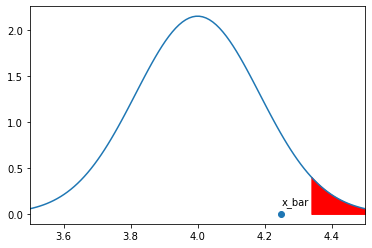

In [15]:
#Plotting the sampling distributions with rejection regions

x_min_1=3.5
x_max_1=4.5

#Defining the sampling distribution mean and sampling distribution std
mean_1=population_mean_1
std_1=sample_std_1/(sample_size_1**0.5)

#setting x limits and plotting the graph
x_1=np.linspace(x_min_1,x_max_1,100)
y_1=norm.pdf(x_1,mean_1,std_1)
plt.xlim(x_min_1,x_max_1)
plt.plot(x_1,y_1)

#Right tailed test
t_critical_right=population_mean_1+(t_crit_1*std_1)

#Shading the right rejection region
x2=np.linspace(t_critical_right,x_max_1,100)
y2=norm.pdf(x2,mean_1,std_1)
plt.fill_between(x2,y2,color='red')


#sample mean lies 
plt.scatter(sample_mean_1, 0)
plt.annotate("x_bar", (sample_mean_1, 0.1))

<b>Conclusion

    In above graph we plotted t critical value for right tailed and we also observed that t score is less than t-critical 
    value so we are failed to reject null hypothesis (average mean should be less than or equal to 4)

<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step-1:\ Alternate Hypothesis (Bold Claim):$$ H_1: \mu >15  $$
Null Hypothesis (Status Quo):$$H_{0}: \mu  \leq 15$$

Step-2:

Collect a sample size n=20$$[14.8,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.4,15.46,13.88,14.31,14.41,15.7,15.38]$$
Compute the sample mean$$\overline{x}=15.130499999999998$$
Step-3: Compute Test statistics$$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.95$

Step-5.1:Rigth tailed t-statistics $$ reject \ H_0 \ if \ ?$$ if  $t\gt;t_{n-1,\alpha}$

Step-5.2: Compute p-value

In [17]:
#given
a2=[14.8,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.4,15.46,13.88,14.31,14.41,15.7,15.38]
n2=20 #sample size 
sample_mean_2=sum(a2)/n2

print(sample_mean_2)

15.130499999999998


In [18]:
#sample std deviation
print(std(a2))

0.9724375301272571


<b>Calculating T score

In [22]:
#Given
sample_mean_2=15.130499999999998
sample_std_2 = 0.9724375301272571
population_mean_2=15
sample_size_2=20

t_score_2=t_scoree(sample_mean_2,population_mean_2,sample_std_2,sample_size_2)
print(t_score_2)

0.6001555102990127


<b>Calculating t critical

In [25]:
import scipy.stats

confidence_level=0.95
alpha=1-confidence_level
df=19 #df is degree of freedom
t_crit_2= scipy.stats.t.ppf(q=1-.05,df=19)  #performing one tailed test
print(t_crit_2)

1.729132811521367


<b>Decision making

In [26]:
#with t score
if t_score_2>t_crit_2:
    print("Reject Null Hypothesis")
else:
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [28]:
#with p value
p_value_2= (1.0-norm.cdf(np.abs(t_score_2)))
print("p_value=",p_value_2)

if(p_value<alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value= 0.27420130031012957
Fail to reject Null Hypothesis


<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step-1:\ Alternate Hypothesis (Bold Claim):$H_{1}: \mu \lt; 100$

Null Hypothesis (Status Quo):$$H_{0}: \mu  \geq 100$$

Step-2:

Collect a sample size n=100
Compute the sample mean$$\overline{x}=99.25$$
Step-3: Compute Test statistics$$t=\frac{\overline{x}-\mu}{s/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.99$

Step-5.1:Rigth tailed t-statistics $reject \ H_{0} \ if \\ t\lt;t_{n-1,\alpha}$
Step-5.2: Compute p-value

In [32]:
#getting data
a3=np.random.randint(95,105,size=100)
print(list(a3))

[102, 97, 101, 99, 103, 102, 97, 98, 96, 95, 95, 96, 96, 103, 98, 95, 98, 100, 100, 103, 96, 95, 99, 104, 96, 96, 99, 99, 99, 100, 101, 98, 103, 103, 99, 95, 99, 99, 97, 99, 95, 98, 98, 98, 96, 103, 102, 96, 103, 95, 101, 97, 97, 97, 98, 103, 102, 100, 102, 100, 101, 97, 104, 99, 96, 95, 95, 100, 95, 98, 104, 100, 95, 95, 104, 99, 102, 96, 96, 96, 95, 95, 100, 103, 97, 98, 100, 101, 98, 101, 96, 99, 104, 104, 102, 104, 96, 101, 97, 96]


In [34]:
#consider sample size=20
n=a3[:20]
print(n)

[102  97 101  99 103 102  97  98  96  95  95  96  96 103  98  95  98 100
 100 103]


In [36]:
sample_mean_3=sum(n)/len(n)
print(sample_mean_3)

98.7


In [37]:
print(std(n))

2.7946377224964243


<b>Computng T score

In [38]:
#given
sample_mean_3=98.7
sample_std_3=2.7946377224964243
population_mean_3=100
sample_size_3=20

t_score_3=t_scoree(sample_mean_3,population_mean_3,sample_std_3,sample_size_3)
print(t_score_3) #we perform let tailed test as t score is negative

-2.0803328798933003


<b>Caculating t critical

In [39]:
confidence_level=0.95
alpha=1-confidence_level
df=19 #df is degree of freedom
t_crit_3= scipy.stats.t.ppf(q=1-.05,df=19)  #performing one tailed test
print(t_crit_3)

1.729132811521367


<b>Decision making
    

In [40]:
if np.abs(t_score_3)>t_crit_3:
    print("Reject Null Hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject Null Hypothesis


In [42]:
p_value_3= (1.0-norm.cdf(np.abs(t_score_3)))
print("p_value=",p_value_2)

if(p_value_3<alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value= 0.27420130031012957
Reject Null Hypothesis


<b>Plotting

Text(98.7, 0.02, 'x_bar')

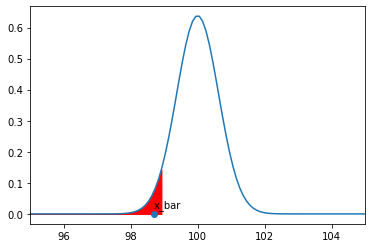

In [46]:
#Plotting the graph

x_min_3=95
x_max_3=105

mean_3=population_mean_3
std_3=sample_std_3/(sample_size_3**0.5)

x3=np.linspace(x_min_3,x_max_3,100)
y3=norm.pdf(x3,mean_3,std_3)

plt.xlim(x_min_3,x_max_3)
plt.plot(x3,y3)

t_critical_left_3=population_mean_3+(-t_crit_3*std_3)

x3=np.linspace(x_min_3,t_critical_left_3,100)
y3=norm.pdf(x3,mean_3,std_3)
plt.fill_between(x3,y3,color='red')

plt.scatter(sample_mean_3,0)
plt.annotate("x_bar",(sample_mean_3,0.02))